# Analizando Datos con PyData 

* Objetivos de la Lección
* SQL y pandas 2 
* Agrupaciones 
*  GroupBy.

# Objetivo de la Lección

* Revisión de Python
* Revisión de la relación entre NumPy y Pandas
* Pipeline, Agregación y Relación entre DataFrames.
* SQL y Pandas 2
* Ejemplo de Análisis de Datos


# Pipeline

Cuando se trabaja con los DataFrame o Serie, cada transformación, filtro o selección de variable puede ser aplicada y seguir con otra operación o transformación. En general se pueden aplicar las secuencias de pasos necesarios haciendo uso solo del "." y "\" para escribir de forma legíble el programa. 

El siguiente ejemplo es un código donde mostramos la diferencia entre escribir en cada línea una transformación o escribirlas seguidas.

In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sample_data/california_housing_train.csv")
data.head(3)  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [0]:
plt.rcParams['figure.figsize'] = 15, 10


In [0]:
#Se toman solo las casas con más de 20 años
tmp1=data[data.housing_median_age>20]
#Se agragan los datos para ver la cantidad de casas por edad
tmp2=tmp1.housing_median_age.value_counts()

In [0]:
tmp2

52.0    1052
36.0     715
35.0     692
34.0     567
33.0     513
26.0     503
25.0     461
32.0     458
37.0     437
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
23.0     382
29.0     374
21.0     373
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
40.0     249
45.0     235
41.0     232
46.0     196
47.0     175
48.0     135
50.0     112
49.0     111
51.0      32
Name: housing_median_age, dtype: int64

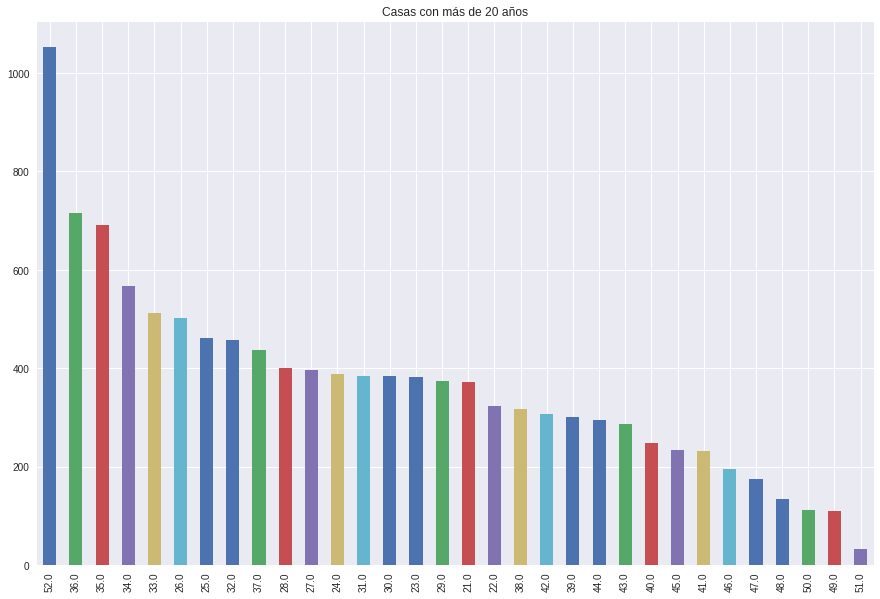

In [0]:
#Se grafican las edades y la cantidad de casas con esa edad.
tmp2.plot(kind='bar',title='Casas con más de 20 años')

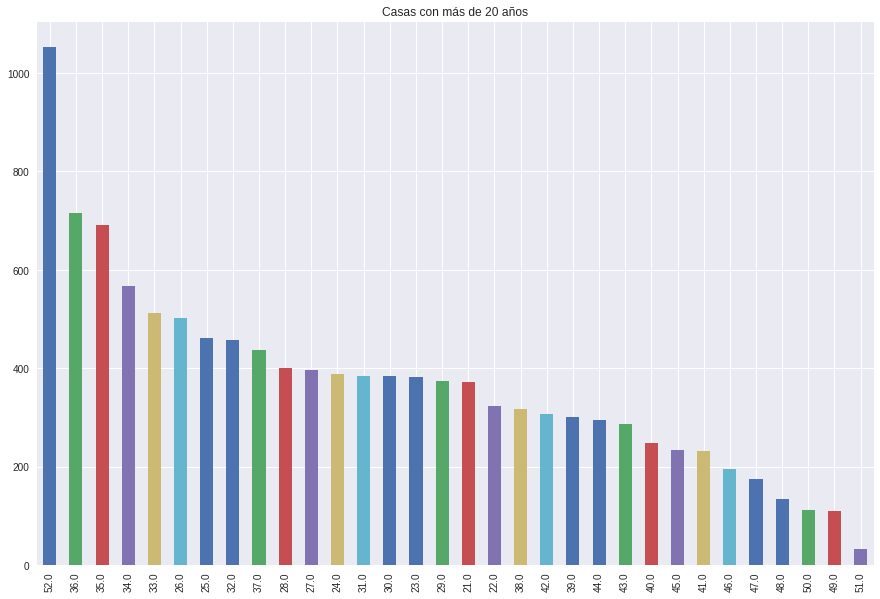

In [0]:
#La siguiente versión hacemos todos los pasos en un solo programa
#Si revisamos con cuidado con respecto a las anteriores líneas de
#código se realizan los mismo pasos.
data.query("housing_median_age>20")\
    ['housing_median_age']\
    .value_counts()\
    .plot(kind='bar',title='Casas con más de 20 años')

¿Qué se gana o qué se pierde?

Se gana consistencia y legibilidad de los pasos, pero resulta necesario conocer qué hace cada método para poder escribir el código mediante una secuencia de transformaciones. Así que la recomendación es hacer pruebas paso a paso y posteriormente tratar de escribir el programa en secuencias de transformaciones.

# Agregar Nuevas Variables o Features

En los ejemplos de las lecciones pasadas se mostró como crear nuevas variables desde variables existentes. Ejemplo el código siguiente:

In [0]:
#Se hace una cópia del DF original

data1=data.copy()

#Version 1
data1['Total_Area_1']=data1['total_rooms']+data1['total_bedrooms']


In [0]:
#Version 2

data1['Total_Area_2']=data1[['total_rooms','total_bedrooms']].sum(axis=1)

In [0]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Total_Area_2
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,6895.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,9551.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,894.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,1838.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,1780.0


Hacemos otro ejemplo, ahora dividimos el valor medio de la casa (median_house_value) y la mediana de los años que tiene la casa(housing_median_age) 



In [0]:
data1.loc[:,'Ration_House_Value_Age']=data1['median_house_value'].div(data1['housing_median_age'])

In [0]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Total_Area_2,Ration_House_Value_Age
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,6895.0,4460.000000
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,9551.0,4215.789474
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,894.0,5041.176471
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,1838.0,5242.857143
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,1780.0,3275.000000


*¿Cómo se podrían crear las dos columnas  y además poder seguir operando con el DataFrame?*

¿Cómo crear una cadena de operaciones?

### Médodo Assign

El método **assign** permite crear columnas en el DF y continuar operando, lo cual permite crear **cadenas de métodos**. Esto ayuda a crear programas con este paradígma o estilo. 

El siguiente ejemplo muestra como se usaría el método:


In [0]:
data2=data.copy()

#Método Assign

Out=data2.assign(Total_Area_1=lambda X: X[['total_rooms','total_bedrooms']].sum(axis=1),
                 Total_Area_2=lambda X: X[['total_rooms','total_bedrooms']].max(axis=1),
                 
             Ration_House_Value_Age=lambda X:X['median_house_value'].div(X['housing_median_age'])
             )
Out.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Total_Area_2,Ration_House_Value_Age
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,5612.0,4460.000000
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,7650.0,4215.789474
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,720.0,5041.176471
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,1501.0,5242.857143
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,1454.0,3275.000000


Si se desea agregar una nueva columna después de aplicar alguna función sobre los valores de otra, se puede crear con el método **assign**. El siguiente código es un ejemplo:

In [0]:
#Método Assign

Out=data2.assign(Total_Area_1=lambda X: X[['total_rooms','total_bedrooms']].sum(axis=1),
                 Ration_House_Value_Age=lambda X:X['median_house_value'].div(X['housing_median_age']),
                Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
                Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))
Out.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Int_Longitude,Int_Latitude
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,-114,34
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,-114,34
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,-114,33
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,-114,33
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,-114,33


Teniendo los anteriores ejemplos, se puede pasar a un nivel más general aún. Por ejemplo, suponiendo que se reciben los archivos de cierta fuente con cierta estructura y se tienen definido el conjunto de nuevas variables que se agregan, se puede pensar en hacer una función que encapsule todo el proceso. El siguiente código es un ejemplo. 

In [0]:
#Función para crear nuevas variables 
#usando el método assign

def Add_Features(df):
  Out=df.assign(Total_Area_1=lambda X: X[['total_rooms','total_bedrooms']].sum(axis=1),
       Ration_House_Value_Age=lambda X:X['median_house_value'].div(X['housing_median_age']),
                Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)))
  return Out

Ejecutamos la función para ver el resultado.

In [0]:
Out=Add_Features(data2)

In [0]:
Out.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Ration_House_Value_Age,Int_Longitude
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,4460.000000,-114
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,4215.789474,-114
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,5041.176471,-114
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,5242.857143,-114
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,3275.000000,-114


**¿Cómo agregar esta función a un flujo de trabajo o cadena de transformaciones?**

Si se observa, al aplicar la función logramos aplicar el de manera encapsulada la creacion de variables usando el método **assign**, pero si deseamos programar flujos o cadenas de transformaciones tenemos el problema de cómo crear un flujo con esta función.

Para mantener la programación mediante **pipeline o flujos de transformaciones**. Se puede considerar como si fuera nuestra función anterior **"un nuevo método"**, algo que podemos aplicar a todos nuestros dataframes para el cual  definimos esta función.

Para esto existe el método **pipe**, esto de cierto modo crea un método definido por el usuario sobre nuestras Series o DataFrames. El código siguientes es un ejemplo de esto:

In [0]:
#Creamos un Pipeline 

def Add_Features(df):
  df=df.copy()
  return df.assign(Total_Area_1=lambda X: X[['total_rooms','total_bedrooms']].sum(axis=1),
       Ration_House_Value_Age=lambda X:X['median_house_value'].div(X['housing_median_age']),
                Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)))
  


In [0]:
#Se ejecuta el ćodigo sobre data2
data2.pipe(Add_Features).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_Area_1,Ration_House_Value_Age,Int_Longitude
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,6895.0,4460.000000,-114
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,9551.0,4215.789474,-114
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,894.0,5041.176471,-114
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1838.0,5242.857143,-114
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1780.0,3275.000000,-114


**¿Cuál es el beneficio de usar pipe?**

A primera vista, puede resulta poco valorado y sin mucho sentido el crear funciones para procesar mediante pipe(). Bueno, viéndolo desde un punto de vista más abstracto, este método nos permite crear "métodos" a nuestro gusto sobre el DF. 

Explico de nuevo, lo que sucede es que la definición de la función para pipe se aplica a nuestros DF como un nuevo método. Por ejemplo, suponiendo el caso en que cada cierto tiempo se recibe un archivo con el mismo tipo de datos y se tiene una función que se puede aplicar mediante un pipe() es equivalente a tener un método personalizado para nuestra necesitad. Por otro lado, nos permite mantener un estilo de programación "declarativa" sobre los DF.
 

#Agrupaciones

En las lecciones anteriores y los ejemplos de arriba, en general se agregan o crearn nuevas variables usando operaciones aritméticas  entre columnas o aplicando funciones sobre ella. 

Suponemos el siguiente problema, de la información anteriores deseamos analizar por el entero que corresponde a cada Latitud o Longitud, la media, el máximo y el mínimo del la media del valor de la casa,¿cómo hacer esto?

Hacemos un código de ejemplo.

In [0]:
#Tomamos la copia del DF
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
#Agradamos extraemos el valor entero de longitud y latitud
data2.assign(Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
            Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))\
            [['Int_Longitude','Int_Latitude','median_house_value']].head()

,Int_Longitude,Int_Latitude,median_house_value
0,-114,34,66900.0
1,-114,34,80100.0
2,-114,33,85700.0
3,-114,33,73400.0
4,-114,33,65500.0


El siguiente código en su primera parte es similar al anterior, pero aplicamos una agupación sobre los valores de la Longitude y Latitude.

In [0]:
data2.assign(Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
            Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))\
            [['Int_Longitude','Int_Latitude','median_house_value']]\
            .groupby(['Int_Longitude','Int_Latitude']).max()

median_house_value
Int_Longitude Int_Latitude                    
-124          40                      165600.0
              41                      143400.0
-123          38                      364800.0
              39                      277000.0
              40                      106300.0
              41                      152700.0
-122          36                      400000.0
              37                      500001.0
              38                      435900.0
              39                      166300.0
              40                      171200.0
              41                      110100.0
-121          35                      320800.0
              36                      500001.0
              37                      500001.0
              38                      448300.0
              39                      361900.0
              40                      193800.0
              41                       88700.0
-120          34                      500001.0
              35                      500001.0
              36                      225000.0
              37                      290500.0
              38                      500001.0
              39                      437500.0
              40                      200000.0
              41                       59200.0
-119          34                      500001.0
              35                      245800.0
              36                      345900.0
              37                      214300.0
              38                      212500.0
-118          33                      500001.0
              34                      500001.0
              35                      216400.0
              36                      147100.0
              37                      242700.0
              38                       82500.0
-117          32                      500001.0
              33                      500001.0
              34                      500001.0
              35                      275000.0
              36                       45500.0
-116          32                      379600.0
              33                      500001.0
              34                      316700.0
              35                       22500.0
              36                       32900.0
-115          32                      159900.0
              33                       87500.0
              34                       42500.0
              35                       67500.0
-114          32                       45000.0
              33                       94900.0
              34                       80100.0

¿Cómo aplicar más de una funcion sobre nuestra agrupación?

In [0]:
data2.assign(Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
            Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))\
            [['Int_Longitude','Int_Latitude','median_house_value']]\
            .groupby(['Int_Longitude','Int_Latitude']).agg({'median_house_value':['max','min','mean','var']}).head(20)

median_house_value                           \
                                          max       min           mean   
Int_Longitude Int_Latitude                                               
-124          40                     165600.0   50800.0   88895.604396   
              41                     143400.0   62800.0   90668.750000   
-123          38                     364800.0   94900.0  166960.869565   
              39                     277000.0   57900.0  122677.049180   
              40                     106300.0   14999.0   72004.304348   
              41                     152700.0   36700.0   73227.272727   
-122          36                     400000.0  112500.0  254170.731707   
              37                     500001.0   22500.0  289829.794734   
              38                     435900.0   49000.0  188748.801370   
              39                     166300.0   14999.0   83664.774648   
              40                     171200.0   48100.0   88320.175439   
              41                     110100.0   46200.0   70244.000000   
-121          35                     320800.0  114600.0  229283.333333   
              36                     500001.0   72900.0  229357.044177   
              37                     500001.0   22500.0  221855.000923   
              38                     448300.0   32500.0  135803.459119   
              39                     361900.0   39400.0  104605.035971   
              40                     193800.0   49500.0   90540.000000   
              41                      88700.0   34200.0   55628.571429   
-120          34                     500001.0   28300.0  177903.350000   

                                          
                                     var  
Int_Longitude Int_Latitude                
-124          40            5.372140e+08  
              41            5.649836e+08  
-123          38            4.831517e+09  
              39            1.730472e+09  
              40            4.593711e+08  
              41            1.101904e+09  
-122          36            3.289410e+09  
              37            1.545883e+10  
              38            5.215881e+09  
              39            7.358694e+08  
              40            5.979214e+08  
              41            2.609509e+08  
-121          35            5.200714e+09  
              36            8.268834e+09  
              37            1.036665e+10  
              38            3.129956e+09  
              39            2.052589e+09  
              40            1.170682e+09  
              41            4.087190e+08  
-120          34            7.761030e+09

El ejemplo anterior puede no resultar del todo interesante, pero en el problema particular de analizar datos resulta más frecuente contar con variables categóricas que variables continuas. En muchos casos las categorías pueden ser muchas y puede ser necesario crear variables estadísticas relacionadas a ellas, como el código anterior.

Se puede pensar que se esta explorando la relación entre más de una variable categorica con respecto a otras variables mediante algunos estadísticos.

# Trabajando con más de una tabla.

En el ejemplo anterior se crear o se puede crar un nuevo DF con los estadísticos de las latitudes y longitudes.


In [0]:
#Se crean los estadísticos de las agrupaciones.

Estadisticos=data2.assign(Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
            Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))\
            [['Int_Longitude','Int_Latitude','median_house_value']]\
            .groupby(['Int_Longitude','Int_Latitude']).agg(['max','min','mean','var'])

Estadisticos.shape

(55, 4)

In [0]:
#Se cambian los nombres de las columnas
Estadisticos.columns=['_'.join(col) for col in Estadisticos.columns]



In [0]:
#Se visualiza el DF final.
Estadisticos.head()

median_house_value_max  median_house_value_min  \
Int_Longitude Int_Latitude                                                   
-124          40                          165600.0                 50800.0   
              41                          143400.0                 62800.0   
-123          38                          364800.0                 94900.0   
              39                          277000.0                 57900.0   
              40                          106300.0                 14999.0   

                            median_house_value_mean  median_house_value_var  
Int_Longitude Int_Latitude                                                   
-124          40                       88895.604396            5.372140e+08  
              41                       90668.750000            5.649836e+08  
-123          38                      166960.869565            4.831517e+09  
              39                      122677.049180            1.730472e+09  
              40                       72004.304348            4.593711e+08

In [0]:
#Mediante esto cambiamos los índices de nuestro DF
Estadisticos.reset_index(inplace=True)

In [0]:
#Visualización del DF
Estadisticos.head()

,Int_Longitude,Int_Latitude,median_house_value_max,median_house_value_min,median_house_value_mean,median_house_value_var
0,-124,40,165600.0,50800.0,88895.604396,5.372140e+08
1,-124,41,143400.0,62800.0,90668.750000,5.649836e+08
2,-123,38,364800.0,94900.0,166960.869565,4.831517e+09
3,-123,39,277000.0,57900.0,122677.049180,1.730472e+09
4,-123,40,106300.0,14999.0,72004.304348,4.593711e+08


In [0]:
#Dimensión de la tabla original
data2.shape

(17000, 9)

Observamos que lo anterior genera DF con dimensiones diferentes, en el caso de desear crear un solo DF con todas las variables, necesitamos operar o trabajar con métodos que nos permitan unir DF. El código siguientes es un ejemplo:

In [0]:
#Agregamos al DF original las dos columnas con los entenros de la Latitud y Longitud
Out=data2.assign(Int_Longitude=lambda X:X.longitude.apply(lambda x: int(x)),
            Int_Latitude=lambda X:X.latitude.apply(lambda x: int(x)))

In [0]:
#Visualizamos el DF
Out.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Int_Longitude,Int_Latitude
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-114,34
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-114,34
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-114,33
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-114,33
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-114,33


In [0]:
#Merge de tablas
Final_DF=Out.merge(Estadisticos,on=['Int_Longitude','Int_Latitude'],how='left')
Final_DF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Int_Longitude,Int_Latitude,median_house_value_max,median_house_value_min,median_house_value_mean,median_house_value_var
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-114,34,80100.0,48100.0,60212.500000,1.637212e+08
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-114,34,80100.0,48100.0,60212.500000,1.637212e+08
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-114,33,94900.0,27500.0,68092.307692,3.392924e+08
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-114,33,94900.0,27500.0,68092.307692,3.392924e+08
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-114,33,94900.0,27500.0,68092.307692,3.392924e+08


El ejemplo es muy sencillo, pero trata de reflejar que existen métodos para operar entre varios DF. Para conocer más detalles se puede consultar la documentación de Pandas:

* [Merge, joing, concat, append en Pandas](https://pandas.pydata.org/pandas-docs/stable/merging.html)




# SQL y Pandas 2

En la lección 3 comentamos ejemplos sencillos de como se pueden replicar ciertas operaciones de SQL en los DataFrame de Pandas. Los siguientes ejemplos hacen uso de GroupBy como operacion en estándar en SQL y también, como lo vimos en los anteriores ejemplos, existe su versión en Pandas.

In [0]:
#Cargamos los datos de los ejemplos
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'

tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Ejemplo SQL 1

~~~sql
SELECT sex, count(*)
FROM tips
GROUP BY sex;
~~~


In [0]:
tips.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [0]:
#tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


SQL 2

~~~sql
SELECT day, AVG(tip), COUNT(*)
FROM tips
GROUP BY day;
~~~

In [0]:
tips.groupby('day').agg({'tip': np.mean, 'day': np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


SQL 3

~~~sql
SELECT smoker, day, COUNT(*), AVG(tip)
FROM tips
GROUP BY smoker, day;
~~~

In [0]:
tips.groupby(['smoker', 'day']).agg({'tip': [np.size, np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

SQL 4

~~~sql
SELECT smoker, day, COUNT(tip), AVG(tip),SUM(total_bill), AVG(tip)
FROM tips
GROUP BY smoker, day
~~~

In [0]:
tips.groupby(['smoker', 'day']).agg({'tip': [np.size, np.mean],'total_bill':[np.sum,np.mean]})

tip           total_bill           
             size      mean        sum       mean
smoker day                                       
No     Fri    4.0  2.812500      73.68  18.420000
       Sat   45.0  3.102889     884.78  19.661778
       Sun   57.0  3.167895    1168.88  20.506667
       Thur  45.0  2.673778     770.09  17.113111
Yes    Fri   15.0  2.714000     252.20  16.813333
       Sat   42.0  2.875476     893.62  21.276667
       Sun   19.0  3.516842     458.28  24.120000
       Thur  17.0  3.030000     326.24  19.190588

## Ejemplo de Análisis de Datos

Realizamos un pequeño análisis con 3 archivos para trabajar, primero limpliamos el entorno y cargamos los archivos.

In [0]:
%clear

In [0]:
%reset -f

In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv("train.csv")
meal=pd.read_csv("meal_info.csv")
center=pd.read_csv("fulfilment_center_info.csv")

data.head(3)  

meal.head(3)
center.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


In [0]:
plt.rcParams['figure.figsize'] = 15, 10

## Metodologías

En la lección 1 presentamos un diagrama propuesto por IBM del proceso a seguir en un proyectos de Ciencia de Datos. Este proceso comparte semejanzas con otra metodología estándar CRISP-DM.

Para este análisis revisamos dos etapas de estas metodologías: Entendimiento de los datos (Data Understanding) y Preparación de los Datos (Data Preparation).

### Entendimiento de los Datos

El objetivo de esta etapa se puede resumir en 3 subetapas:
* Colección de Datos
* Propiedades de los Datos
* Calidad de los Datos

*¿Cómo podemos usar Pandas para esta etapa?*

In [0]:
#Se exploran los detalles de los
#tres DataFrames

data.info()

meal.info()
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64


In [0]:
#Se revisa si cuanta con id repetidos
data.shape[0]==data.id.drop_duplicates().count()

True

In [0]:
print("Center_ id")
data.center_id.drop_duplicates().count()

print()
print("Meal id")
data.meal_id.drop_duplicates().count()

Center_ id


77


Meal id


51

In [0]:
#Cantidad de semanas diferentes
data.week.drop_duplicates().count()

145

In [0]:
#La cantidad de registros por semana
data.week.value_counts(sort=False)

1      2922
2      2896
3      2899
4      2889
5      2859
6      2846
7      2795
8      2786
9      2854
10     2859
11     2863
12     2831
13     2838
14     2830
15     2868
16     2850
17     2888
18     2962
19     2939
20     2924
21     2963
22     2923
23     2960
24     2946
25     2972
26     3014
27     3029
28     3044
29     3026
30     3068
       ... 
116    3275
117    3290
118    3278
119    3221
120    3261
121    3298
122    3359
123    3331
124    3274
125    3247
126    3254
127    3255
128    3278
129    3291
130    3258
131    3293
132    3276
133    3324
134    3330
135    3261
136    3273
137    3283
138    3278
139    3279
140    3332
141    3263
142    3238
143    3305
144    3302
145    3268
Name: week, Length: 145, dtype: int64

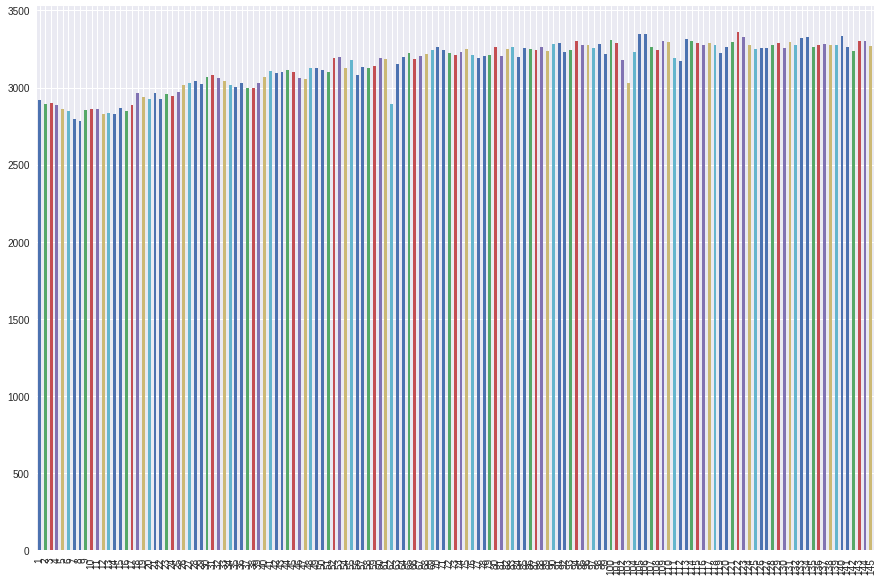

In [0]:
#Gráfica de la cantidad de registros por semana
data.week.value_counts(sort=False).plot(kind='bar')

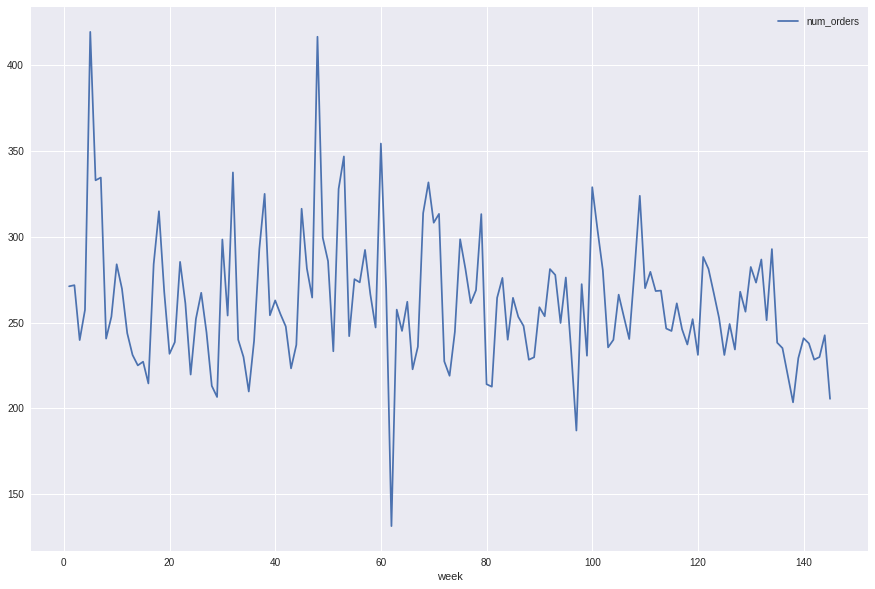

In [0]:
#Comportamieno del número de ordenes
#por cada semana
data[['week','num_orders']]\
    .groupby('week').mean()\
    .plot()
    

In [0]:
#Exploración de la semana 60
data[data.week==60].head(20)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
176985,1074454,60,55,1885,141.62,142.62,0,0,271
176986,1396057,60,55,1993,140.68,139.68,0,0,378
176987,1032003,60,55,2539,147.50,147.50,0,0,150
176988,1083591,60,55,2139,298.82,296.82,0,0,15
176989,1182979,60,55,2631,155.26,154.26,0,0,14
176990,1445863,60,55,1248,137.74,153.26,0,0,15
176991,1352066,60,55,1778,163.99,183.33,0,0,121
176992,1470214,60,55,1062,162.02,183.39,0,0,176
176993,1064569,60,55,2707,229.89,230.89,0,0,229
176994,1034105,60,55,1207,458.87,457.87,0,0,82


### Preparación de los Datos

Esta etapa se puede sintentizar en 4 subetapas:

* Limpieza
* Transformación
* Unión de Tablas
* Formato

Esta etapa esta en retroalimentación la construcción de un Modelo, así que cada ocasión que se terminar se pasa a probar el modelo y uno puede regresar aplicar otras técnica para cada una de las subetapas.

*¿Cómo nos ayuda Pandas a realizar esta etapa?*

In [0]:
#Cómo se limpiarían los datos?
#Espacio para realizar ejemplos

## Notas finales:

El método assign() y pipe() junto con otros como, rename(),resample(), filter(),groupby(), etc. Permiten hacer programas más legíbles y concisos. En un primer acercamiento a Pandas, puede no resultar del todo claro el valor de esos dos métodos, pero con la práctica y la diversidad de casos de negocio o uso que se tengan, empieza hacerse notar su relevancia a la hora de hacer algun programa con Pandas.

Una de las operaciones más importantes en Pandas son la capacidad de realizar GroupBy, estos métodos son en esencia lo que le da sentido al Análisis de Datos.

Las operaciones con DF, merge, join, append, concat; tienen la capacidad de operar no solo sobre las columnas , sino también sobre los índices.

## Referencias y Créditos:

Libros:

* [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)

Sitios Web:

*  [Tutorial de Tom Augspurger]( https://tomaugspurger.github.io/method-chaining)
* [Tutorial de Greg Reda, enfocado a SQL y Pandas](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)

Cŕéditos:
Los datos usados para los ejemplos de SQL son parte de set de datos de test de [Pandas](https://github.com/pandas-dev).

Los datos usados para el ejemplo del Análisis de Datos son correspondientes al 
[genpact-machine-learning-hackathon](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon/#problem_statement).


 
      